In [3]:
import pandas as pd

In [ ]:
pip install pandas numpy matplotlib scikit-learn seaborn

In [4]:
import tensorflow as tf

In [2]:
pip install tensorflow

     ---------------------------------------- 0.0/46.1 kB ? eta -:--:--
     ---------------------------------------- 46.1/46.1 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.4/377.1 MB 7.4 MB/s eta 0:00:51
   ---------------------------------------- 0.7/377.1 MB 8.3 MB/s eta 0:00:46
   ---------------------------------------- 0.8/377.1 MB 6.6 MB/s eta 0:00:57
   ---------------------------------------- 1.2/377.1 MB 6.7 MB/s eta 0:00:57
   ---------------------------------------- 1.4/377.1 MB 6.5 MB/s eta 0:00:58
   ---------------------------------------- 1.7/377.1 MB 6.4 MB/s eta 0:00:59
   ---------------------------------------- 2.0/377.1 MB 6.5 MB/s eta 0:00:59
   ---------------------------------------- 2.3/377.1 MB 6.4 MB/s eta 0:00:59
   ---------------------------------------- 2.7/377.1 MB 6.6 MB/s eta 0:00:58
   ---------------------------------------- 3.2/377.1 MB 7.1 MB/s eta 0:00:

In [6]:
import tensorflow as tf 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D, Dense, Flatten ,Dropout,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

Preprocessing

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [8]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
print(X_train.shape)

(60000, 28, 28)


Noramalizaing the images, so that the image pixels range from 0 to 1. this is a common step in preprocessing that helps in the modelling stage.

In [10]:
X_train = X_train/255
X_test = X_test/255

Expanding the dimensions of X_train & X_test so that the data can enter the model as it needs the input shape to be 3 - dimensional

In [11]:
X_train=np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)

(60000, 28, 28, 1)


In [12]:
num_classes = len(set(y_train))
print('Number of classes:',num_classes)

Number of classes: 10


CNN Model

Feel  free to try different models or mess with this one to achieve better results or discover new insights about the data

In [14]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 22, 22, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 20, 20, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 18, 18, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      10,617,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,600,394 (44.25 MB)

 Trainable params: 11,600,394 (44.25 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history=model.fit(X_train,
            y_train,
            validation_data=(X_test,y_test),
            epochs=10,
            batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 883s 468ms/step - accuracy: 0.7628 - loss: 0.6445 - val_accuracy: 0.8832 - val_loss: 0.3340
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 529s 282ms/step - accuracy: 0.8813 - loss: 0.3302 - val_accuracy: 0.9003 - val_loss: 0.2755
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 532s 284ms/step - accuracy: 0.8969 - loss: 0.2809 - val_accuracy: 0.9079 - val_loss: 0.2508
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 528s 281ms/step - accuracy: 0.9063 - loss: 0.2553 - val_accuracy: 0.9095 - val_loss: 0.2464
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 546s 291ms/step - accuracy: 0.9117 - loss: 0.2355 - val_accuracy: 0.9138 - val_loss: 0.2403
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 528s 281ms/step - accuracy: 0.9189 - loss: 0.2144 - val_accuracy: 0.9167 - val_loss: 0.2365
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 528s 282ms/step - accuracy: 0.9234 - loss: 0.2067 - val_accuracy: 0.9137 - val_loss: 0.2385
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 534s 285ms/step - ac

In [26]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.88      0.88      1000
           3       0.92      0.94      0.93      1000
           4       0.87      0.87      0.87      1000
           5       0.99      0.97      0.98      1000
           6       0.79      0.77      0.78      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Visualizing the model's performance

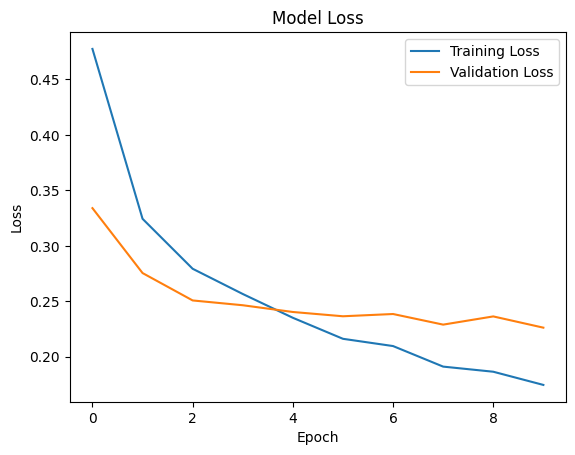

In [21]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

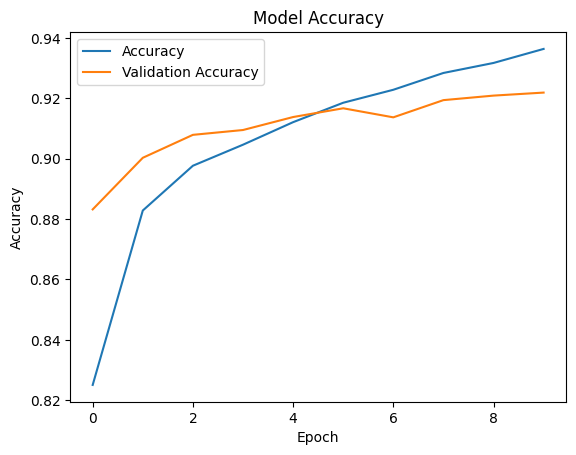

In [22]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Confustion Matrix

In [24]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 161ms/step


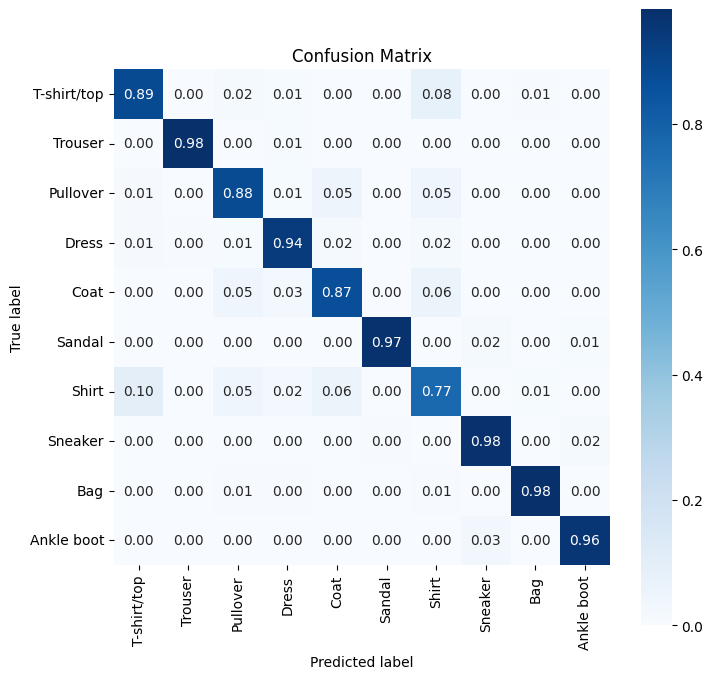

In [25]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Defining class names for Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Generating confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', square=True,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

We can see that model performs well on all classes except for Shirt, which is confused with T-shirt/top and other classes. that is mainly because they all look similar to each other and the images doesn't have enough details to get that separating difference as it is only 28*28 in size.

Misclassified Labels

Let's take a look on some of the misclassified classes

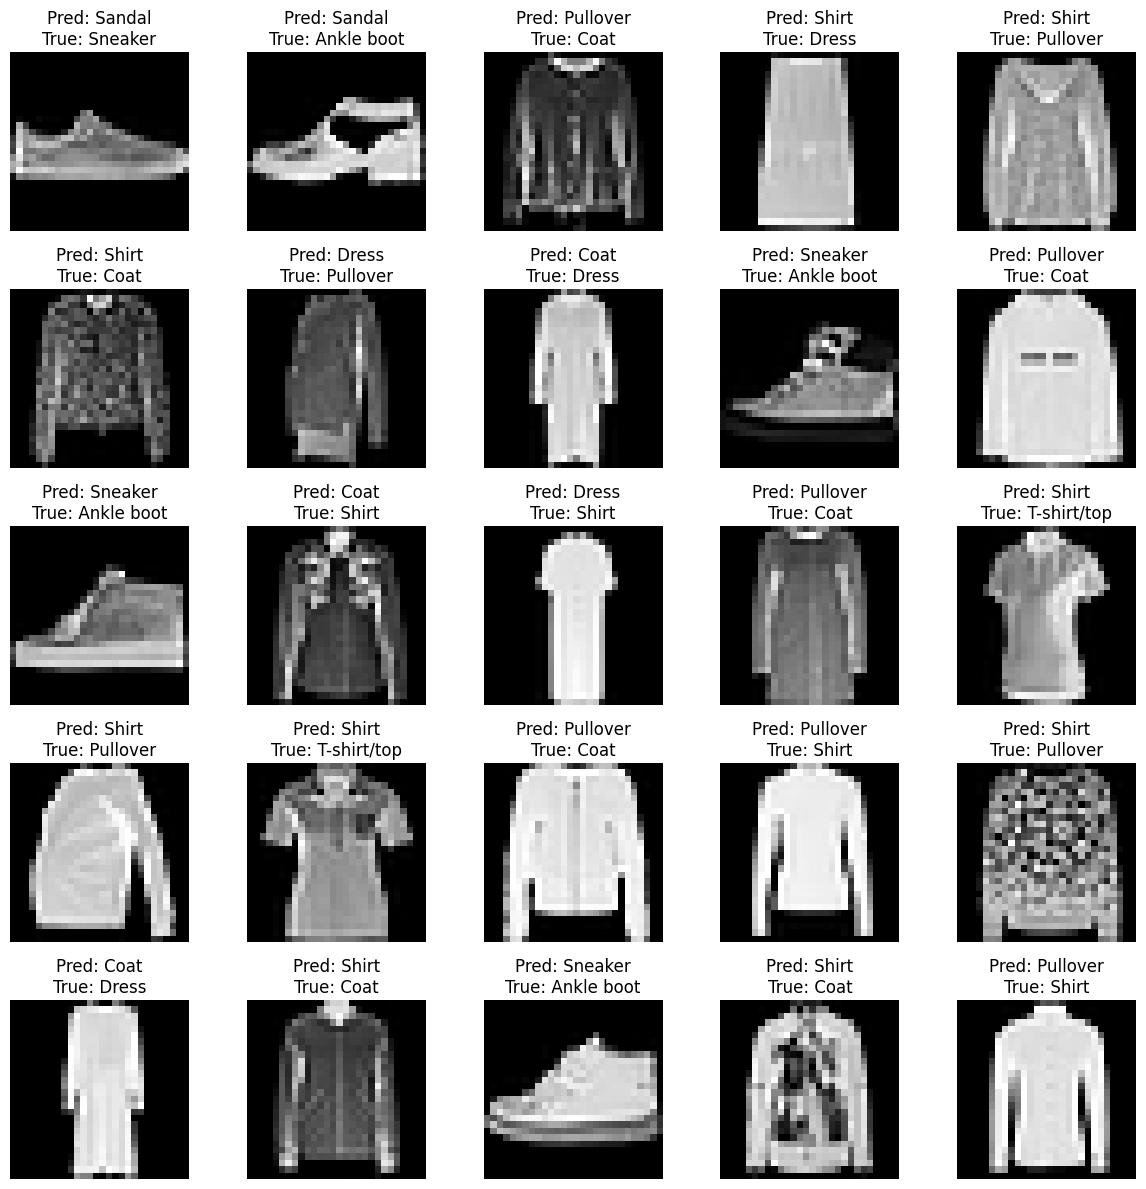

In [28]:
misclassified_indices = np.where(y_pred != y_true)[0]

num_rows = 5
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
for i, idx in enumerate(misclassified_indices[:num_rows * num_cols]):
    img = X_test[idx]
    pred_label = class_names[y_pred[idx]]
    true_label = class_names[y_true[idx]]
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(img, cmap='gray')
    axes[row, col].set_title(f'Pred: {pred_label}\nTrue: {true_label}')
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()

In [29]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.88      0.88      1000
           3       0.92      0.94      0.93      1000
           4       0.87      0.87      0.87      1000
           5       0.99      0.97      0.98      1000
           6       0.79      0.77      0.78      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

